Reading the csv file

In [64]:
import pandas as pd
import warnings

#filter warnings
warnings.filterwarnings('ignore')

#Read the data
df = pd.read_csv('test2data.csv')
df.head()

,ID,Device,Frequency,Value,Timestamp
0,0,"Station3, dev test",0.0,2462.0,2021-02-28T00:00:38.857Z
1,1,"Station3, dev test",0.0,337.0,2021-02-28T00:01:20.419Z
2,2,"Station3, dev test",0.0,446.0,2021-02-28T00:02:01.933Z
3,3,"Station3, dev test",0.0,5963.0,2021-02-28T00:02:43.310Z
4,4,"Station3, dev test",0.0,1603.0,2021-02-28T00:03:25.112Z


Let us see size of the data 

In [65]:
#size of dataset
df.shape

(1619968, 5)

The dataset consists of 1619968 rows and 5 columns

Let us see count of values per each station

In [66]:
#number of classes in Device variable
df.Device.value_counts()

Station4, dev test    568320
Station1, dev test    536064
Station3, dev test    515584
Name: Device, dtype: int64

Let us split the Timestamp column

In [67]:
# convert Timestamp to datetime

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,ID,Device,Frequency,Value,Timestamp
0,0,"Station3, dev test",0.0,2462.0,2021-02-28 00:00:38.857000+00:00
1,1,"Station3, dev test",0.0,337.0,2021-02-28 00:01:20.419000+00:00
2,2,"Station3, dev test",0.0,446.0,2021-02-28 00:02:01.933000+00:00
3,3,"Station3, dev test",0.0,5963.0,2021-02-28 00:02:43.310000+00:00
4,4,"Station3, dev test",0.0,1603.0,2021-02-28 00:03:25.112000+00:00


Create separate columns for year, month, day, hour, minute and second. 

In [68]:
# Create separate column for Year
df['Year'] = df.Timestamp.dt.year 
# Create separate column for Month
df['Month'] = df.Timestamp.dt.month
# Create separate column for Day
df['Day'] = df.Timestamp.dt.day
# Create separate column for Hour
df['Hour'] = df.Timestamp.dt.hour
# Create separate column for Minute
df['Minute'] = df.Timestamp.dt.minute
# Create separate column for Second
df['Second'] = df.Timestamp.dt.second

df.head()

,ID,Device,Frequency,Value,Timestamp,Year,Month,Day,Hour,Minute,Second
0,0,"Station3, dev test",0.0,2462.0,2021-02-28 00:00:38.857000+00:00,2021,2,28,0,0,38
1,1,"Station3, dev test",0.0,337.0,2021-02-28 00:01:20.419000+00:00,2021,2,28,0,1,20
2,2,"Station3, dev test",0.0,446.0,2021-02-28 00:02:01.933000+00:00,2021,2,28,0,2,1
3,3,"Station3, dev test",0.0,5963.0,2021-02-28 00:02:43.310000+00:00,2021,2,28,0,2,43
4,4,"Station3, dev test",0.0,1603.0,2021-02-28 00:03:25.112000+00:00,2021,2,28,0,3,25


Creating new column 'Source' for sources of sound for different frequency values

In [69]:
# Blender is the source of sound, the time range between 17.22 and 17.27 and between 17.29 and 17.34
df_blender1 = df[df['Hour'].between(17,17) & df['Minute'].between(22,27)]
df_blender1
df_blender2 = df[df['Hour'].between(17,17) & df['Minute'].between(29,34)]
df_blender2
df_bnd = [df_blender1, df_blender2]
df_blender = pd.concat(df_bnd)
df_blender['Source'] = 'Blender'
df_blender

,ID,Device,Frequency,Value,Timestamp,Year,Month,Day,Hour,Minute,Second,Source
1785,1785,"Station3, dev test",0.00,79596.00,2021-02-28 17:22:10.427000+00:00,2021,2,28,17,22,10,Blender
1796,1796,"Station3, dev test",0.00,67105.00,2021-02-28 17:22:51.099000+00:00,2021,2,28,17,22,51,Blender
1807,1807,"Station3, dev test",0.00,10422.00,2021-02-28 17:23:32.233000+00:00,2021,2,28,17,23,32,Blender
1818,1818,"Station3, dev test",0.00,5478.00,2021-02-28 17:24:12.937000+00:00,2021,2,28,17,24,12,Blender
1828,1828,"Station3, dev test",0.00,11356.00,2021-02-28 17:24:53.997000+00:00,2021,2,28,17,24,53,Blender
...,...,...,...,...,...,...,...,...,...,...,...,...
1619338,1619338,"Station4, dev test",21963.87,6079.04,2021-02-28 17:32:23.949000+00:00,2021,2,28,17,32,23,Blender
1619339,1619339,"Station4, dev test",21963.87,31301.41,2021-02-28 17:33:00.568000+00:00,2021,2,28,17,33,0,Blender
1619340,1619340,"Station4, dev test",21963.87,7182.58,2021-02-28 17:33:37.538000+00:00,2021,2,28,17,33,37,Blender
1619341,1619341,"Station4, dev test",21963.87,244.23,2021-02-28 17:34:14.654000+00:00,2021,2,28,17,34,14,Blender


In [70]:
# Quiet is the source of sound, the time range between 17.36 and 17.41
df_quiet = df[df['Hour'].between(17,17) & df['Minute'].between(36,41)]
df_quiet['Source'] = 'Quiet'
df_quiet

,ID,Device,Frequency,Value,Timestamp,Year,Month,Day,Hour,Minute,Second,Source
2012,2012,"Station3, dev test",0.00,10889.00,2021-02-28 17:36:24.976000+00:00,2021,2,28,17,36,24,Quiet
2023,2023,"Station3, dev test",0.00,12559.00,2021-02-28 17:37:05.363000+00:00,2021,2,28,17,37,5,Quiet
2034,2034,"Station3, dev test",0.00,2007.00,2021-02-28 17:37:46.131000+00:00,2021,2,28,17,37,46,Quiet
2045,2045,"Station3, dev test",0.00,11875.00,2021-02-28 17:38:26.642000+00:00,2021,2,28,17,38,26,Quiet
2056,2056,"Station3, dev test",0.00,27483.00,2021-02-28 17:39:07.319000+00:00,2021,2,28,17,39,7,Quiet
...,...,...,...,...,...,...,...,...,...,...,...,...
1619349,1619349,"Station4, dev test",21963.87,2541.91,2021-02-28 17:39:10.428000+00:00,2021,2,28,17,39,10,Quiet
1619350,1619350,"Station4, dev test",21963.87,5262.12,2021-02-28 17:39:47.154000+00:00,2021,2,28,17,39,47,Quiet
1619351,1619351,"Station4, dev test",21963.87,3108.03,2021-02-28 17:40:24.218000+00:00,2021,2,28,17,40,24,Quiet
1619352,1619352,"Station4, dev test",21963.87,3820.36,2021-02-28 17:41:01.304000+00:00,2021,2,28,17,41,1,Quiet


In [71]:
# Speaker is the source of sound, the time range between 17.51 and 17.56
df_speaker = df[df['Hour'].between(17,17) & df['Minute'].between(51,56)]
df_speaker['Source'] = 'Speaker'
df_speaker

,ID,Device,Frequency,Value,Timestamp,Year,Month,Day,Hour,Minute,Second,Source
2250,2250,"Station3, dev test",0.00,31953.00,2021-02-28 17:51:22.119000+00:00,2021,2,28,17,51,22,Speaker
2261,2261,"Station3, dev test",0.00,20794.00,2021-02-28 17:52:03.047000+00:00,2021,2,28,17,52,3,Speaker
2272,2272,"Station3, dev test",0.00,120921.00,2021-02-28 17:52:43.435000+00:00,2021,2,28,17,52,43,Speaker
2282,2282,"Station3, dev test",0.00,8785.00,2021-02-28 17:53:24.240000+00:00,2021,2,28,17,53,24,Speaker
2293,2293,"Station3, dev test",0.00,210728.00,2021-02-28 17:54:05.243000+00:00,2021,2,28,17,54,5,Speaker
...,...,...,...,...,...,...,...,...,...,...,...,...
1619373,1619373,"Station4, dev test",21963.87,3594.10,2021-02-28 17:53:59.478000+00:00,2021,2,28,17,53,59,Speaker
1619374,1619374,"Station4, dev test",21963.87,17241.21,2021-02-28 17:54:37.163000+00:00,2021,2,28,17,54,37,Speaker
1619375,1619375,"Station4, dev test",21963.87,11100.53,2021-02-28 17:55:14.273000+00:00,2021,2,28,17,55,14,Speaker
1619376,1619376,"Station4, dev test",21963.87,8172.43,2021-02-28 17:55:51.128000+00:00,2021,2,28,17,55,51,Speaker


In [72]:
# No source of sound
df1 = df[~df.index.isin(list(df_blender.index))]
df2 = df1[~df1.index.isin(list(df_quiet.index))]
df_no_sound = df2[~df2.index.isin(list(df_speaker.index))]
df_no_sound['Source'] = 'No Sound'
df_no_sound

,ID,Device,Frequency,Value,Timestamp,Year,Month,Day,Hour,Minute,Second,Source
0,0,"Station3, dev test",0.00,2462.00,2021-02-28 00:00:38.857000+00:00,2021,2,28,0,0,38,No Sound
1,1,"Station3, dev test",0.00,337.00,2021-02-28 00:01:20.419000+00:00,2021,2,28,0,1,20,No Sound
2,2,"Station3, dev test",0.00,446.00,2021-02-28 00:02:01.933000+00:00,2021,2,28,0,2,1,No Sound
3,3,"Station3, dev test",0.00,5963.00,2021-02-28 00:02:43.310000+00:00,2021,2,28,0,2,43,No Sound
4,4,"Station3, dev test",0.00,1603.00,2021-02-28 00:03:25.112000+00:00,2021,2,28,0,3,25,No Sound
...,...,...,...,...,...,...,...,...,...,...,...,...
1619963,1619963,"Station4, dev test",21963.87,714.18,2021-02-28 23:57:02.552000+00:00,2021,2,28,23,57,2,No Sound
1619964,1619964,"Station4, dev test",21963.87,3008.06,2021-02-28 23:57:39.268000+00:00,2021,2,28,23,57,39,No Sound
1619965,1619965,"Station4, dev test",21963.87,2936.57,2021-02-28 23:58:15.316000+00:00,2021,2,28,23,58,15,No Sound
1619966,1619966,"Station4, dev test",21963.87,3093.92,2021-02-28 23:58:52.239000+00:00,2021,2,28,23,58,52,No Sound


Merging the all dataframes

In [73]:
# Merging the all dataframes
df_new = [df_no_sound, df_blender, df_quiet, df_speaker]
df = pd.concat(df_new)
df

,ID,Device,Frequency,Value,Timestamp,Year,Month,Day,Hour,Minute,Second,Source
0,0,"Station3, dev test",0.00,2462.00,2021-02-28 00:00:38.857000+00:00,2021,2,28,0,0,38,No Sound
1,1,"Station3, dev test",0.00,337.00,2021-02-28 00:01:20.419000+00:00,2021,2,28,0,1,20,No Sound
2,2,"Station3, dev test",0.00,446.00,2021-02-28 00:02:01.933000+00:00,2021,2,28,0,2,1,No Sound
3,3,"Station3, dev test",0.00,5963.00,2021-02-28 00:02:43.310000+00:00,2021,2,28,0,2,43,No Sound
4,4,"Station3, dev test",0.00,1603.00,2021-02-28 00:03:25.112000+00:00,2021,2,28,0,3,25,No Sound
...,...,...,...,...,...,...,...,...,...,...,...,...
1619373,1619373,"Station4, dev test",21963.87,3594.10,2021-02-28 17:53:59.478000+00:00,2021,2,28,17,53,59,Speaker
1619374,1619374,"Station4, dev test",21963.87,17241.21,2021-02-28 17:54:37.163000+00:00,2021,2,28,17,54,37,Speaker
1619375,1619375,"Station4, dev test",21963.87,11100.53,2021-02-28 17:55:14.273000+00:00,2021,2,28,17,55,14,Speaker
1619376,1619376,"Station4, dev test",21963.87,8172.43,2021-02-28 17:55:51.128000+00:00,2021,2,28,17,55,51,Speaker


Let us see classes in 'Source' target variable,

In [74]:
df.Source.value_counts(normalize=True)

No Sound    0.982775
Blender     0.008534
Quiet       0.004425
Speaker     0.004267
Name: Source, dtype: float64

Here, we can observed that one class is dominating on other classes. So, data is imbalanced.

Let us convert categorical variables into numercal variables,

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert categorical Device variable to numeric
le_device = le.fit_transform(df['Device'])
print(le_device)

# Convert categorical Device variable to numeric
le_source = le.fit_transform(df['Source'])
print(le_source)

[1 1 1 ... 2 2 2]
[1 1 1 ... 3 3 3]


Let us convert numpy arrays to dataframe

In [76]:
#convert to dataframe
df['Device'] = pd.DataFrame(le_device)
df['Source'] = pd.DataFrame(le_source)
df

,ID,Device,Frequency,Value,Timestamp,Year,Month,Day,Hour,Minute,Second,Source
0,0,1,0.00,2462.00,2021-02-28 00:00:38.857000+00:00,2021,2,28,0,0,38,1
1,1,1,0.00,337.00,2021-02-28 00:01:20.419000+00:00,2021,2,28,0,1,20,1
2,2,1,0.00,446.00,2021-02-28 00:02:01.933000+00:00,2021,2,28,0,2,1,1
3,3,1,0.00,5963.00,2021-02-28 00:02:43.310000+00:00,2021,2,28,0,2,43,1
4,4,1,0.00,1603.00,2021-02-28 00:03:25.112000+00:00,2021,2,28,0,3,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1619373,1619373,2,21963.87,3594.10,2021-02-28 17:53:59.478000+00:00,2021,2,28,17,53,59,3
1619374,1619374,1,21963.87,17241.21,2021-02-28 17:54:37.163000+00:00,2021,2,28,17,54,37,3
1619375,1619375,1,21963.87,11100.53,2021-02-28 17:55:14.273000+00:00,2021,2,28,17,55,14,3
1619376,1619376,1,21963.87,8172.43,2021-02-28 17:55:51.128000+00:00,2021,2,28,17,55,51,3


## Building a Classification model

Split the dataset into train and test data


In [77]:
# Remove ID and Timestamp variables not required for building a model
df = df.drop(['ID','Timestamp'],axis=1)

# splitting the dataset
from sklearn.model_selection import train_test_split

X = df.drop('Source', axis=1)
y = df.Source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of X_test is {X_test.shape}')
print(f'Shape of y_test is {y_test.shape}')

Shape of X_train is (1214976, 9)
Shape of y_train is (1214976,)
Shape of X_test is (404992, 9)
Shape of y_test is (404992,)


Normalizing the Value variable

In [78]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# MinMaxScaler
scaler = MinMaxScaler()

# fit the X_train
scaler.fit(X_train)
# transform the X_train
scaled_train=scaler.transform(X_train)
# convert to dataframe
X_train_scaled = pd.DataFrame(scaled_train,columns=X_train.columns)

# transform the X_test
scaled_test=scaler.transform(X_test)
# convert to dataframe
X_test_scaled = pd.DataFrame(scaled_test,columns=X_test.columns)

Let us build LightGBM model for classification

In [79]:
import lightgbm as lgbm 

X = X_train_scaled
y = y_train

# Split the X_train into train and validation data
X_t, X_v, y_t, y_v = train_test_split(X,y, test_size=0.2)

print(f'Shape of X_t is {X_t.shape}')
print(f'Shape of y_t is {y_t.shape}')
print(f'Shape of X_v is {X_v.shape}')
print(f'Shape of y_v is {y_v.shape}')

Shape of X_t is (971980, 9)
Shape of y_t is (971980,)
Shape of X_v is (242996, 9)
Shape of y_v is (242996,)


Training the lightgbm model


In [108]:
from lightgbm import LGBMClassifier

# Training the model
lgb = LGBMClassifier(n_estimators=500,random_state=42,objective='multiclass',class_weight='balanced')
lgb.fit(X_train_scaled,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=42, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

Model performance on test data

In [109]:
import numpy as np 

#predict model on test data
lgb_pred=lgb.predict(X_test_scaled,random_state=42)
print(lgb_pred)

#get predict probabilities
lgb_pred_prob=lgb.predict_proba(X_test_scaled,random_state=42)
print(lgb_pred_prob)

[1 1 1 ... 1 1 1]
[[4.19734635e-09 9.99999995e-01 6.42324724e-10 5.64951133e-11]
 [1.53299172e-06 9.99998464e-01 3.25145787e-09 6.65624303e-11]
 [1.49078290e-06 9.99998509e-01 3.89725925e-11 1.39502655e-13]
 ...
 [5.58744750e-08 9.99999944e-01 1.18068822e-10 8.13723994e-13]
 [1.31672264e-08 9.99999987e-01 1.20541739e-10 2.94123455e-11]
 [4.70507520e-08 9.99999952e-01 3.83495104e-10 1.65767554e-10]]


Let us check accuracy of the model

In [126]:
# Accuracy of the model
lgb_score = accuracy_score(lgb_pred, y_test)
print(f'Accuracy of LightGBM model is {lgb_score}')

Accuracy of LightGBM model is 0.9967135153286979


Let us plot feature importance

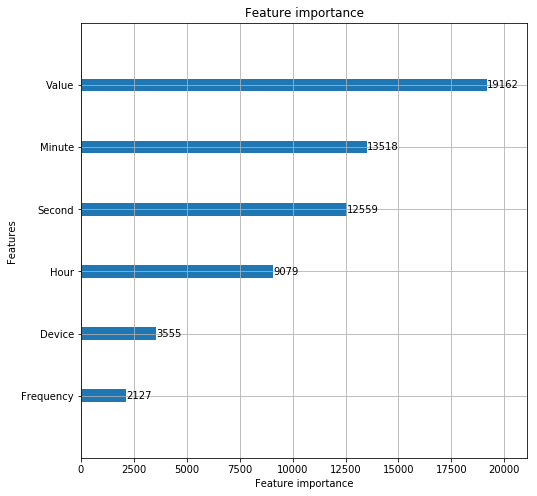

In [111]:
lgbm.plot_importance(lgb,max_num_features=12,importance_type="split",figsize=(8,8))

The important features are Value, Minute, Second and Hour.

Let us plot confusion matrix

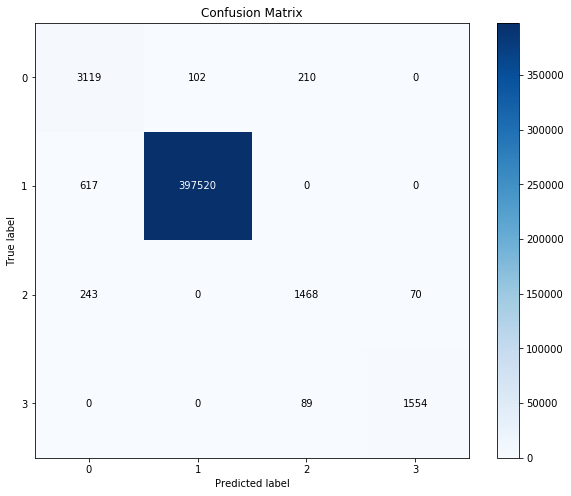

In [112]:
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc

#plot confusion matrix
plot_confusion_matrix(y_test,lgb_pred, figsize=(10,8))

Let us print the classification report

In [113]:
from sklearn.metrics import classification_report,accuracy_score

#Classification report
lgbm_report=classification_report(y_test,lgb_pred,target_names=['Blender','No_Sound','Quiet','Speaker'])
print(lgbm_report)

              precision    recall  f1-score   support

     Blender       0.78      0.91      0.84      3431
    No_Sound       1.00      1.00      1.00    398137
       Quiet       0.83      0.82      0.83      1781
     Speaker       0.96      0.95      0.95      1643

    accuracy                           1.00    404992
   macro avg       0.89      0.92      0.90    404992
weighted avg       1.00      1.00      1.00    404992



Let us plot ROC curve

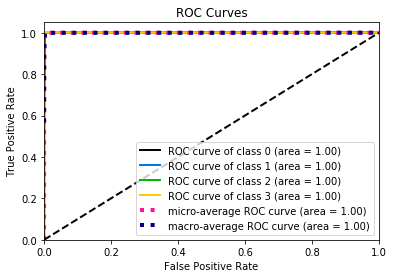

In [115]:
# Plot ROC curve
plot_roc(y_test,lgb_pred_prob)

Let us build XGBoost model for classification

Training the XGBoost model

In [117]:
import xgboost
from xgboost import XGBClassifier

#Training model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_scaled,y_train)

[02:44:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Model performance on test data


In [124]:
#Model performance on test data
xgb_pred = xgb.predict(X_test_scaled)
print(xgb_pred)

#get predict probabilities
xgb_pred_prob = xgb.predict_proba(X_test_scaled)
xgb_pred_prob

[1 1 1 ... 1 1 1]


array([[2.6214252e-07, 9.9999940e-01, 1.6402643e-07, 1.3201934e-07],
       [2.9443754e-07, 9.9999952e-01, 9.9324396e-08, 5.7088357e-08],
       [3.8871835e-07, 9.9999952e-01, 4.2486818e-08, 2.4133804e-08],
       ...,
       [4.4326438e-07, 9.9999940e-01, 1.0130271e-07, 5.6442520e-08],
       [2.5641509e-07, 9.9999964e-01, 9.1205195e-08, 5.0164942e-08],
       [2.4661102e-07, 9.9999964e-01, 9.5813853e-08, 6.9312115e-08]],
      dtype=float32)

Let us check accuracy of the model

In [127]:
# accuracy score
xgb_score = accuracy_score(xgb_pred, y_test)
print(f'Accuracy of XGBoost model is {xgb_score}')

Accuracy of XGBoost model is 0.9977530420353983


Let us check important features

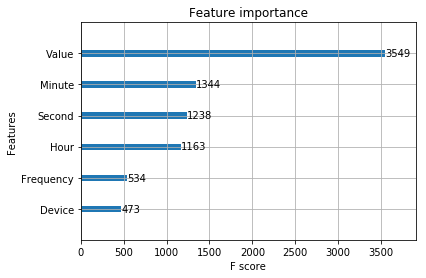

In [120]:
# To get important features
xgboost.plot_importance(xgb,importance_type='weight')

The important features are Value, Minute, Second and Hour.

Let us plot confusion matrix

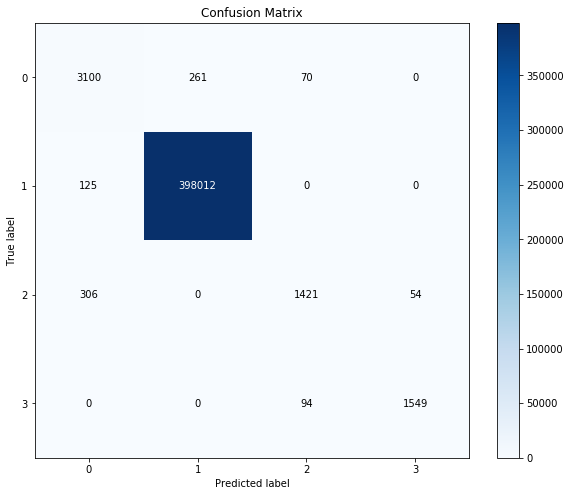

In [122]:
# Plot confusion matrix
plot_confusion_matrix(y_test,xgb_pred, figsize=(10,8))

Let us print the classification report

In [123]:
# Classification report
xgbm_report=classification_report(y_test,xgb_pred,target_names=['Blender','No_Sound','Quiet','Speaker'])
print(xgbm_report)

              precision    recall  f1-score   support

     Blender       0.88      0.90      0.89      3431
    No_Sound       1.00      1.00      1.00    398137
       Quiet       0.90      0.80      0.84      1781
     Speaker       0.97      0.94      0.95      1643

    accuracy                           1.00    404992
   macro avg       0.94      0.91      0.92    404992
weighted avg       1.00      1.00      1.00    404992



Let us plot ROC curve


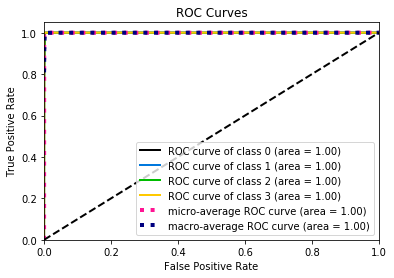

In [125]:
# plot ROC curve
plot_roc(y_test,xgb_pred_prob)

When we compare LightGBM and XGBoost models, both are performing well.